# Import libraries

In [1]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':120})

# Loading data

In [2]:
df_org = pd.read_csv('ShopeeData.csv')
df_org.head()

,itemid,shopid,liked_count,cmt_count,discount,shop_location,shop_rating,name,historical_sold,price,rating_star,rating_count,rcount_with_context,status,Date
0,20030969576,18363975,25677,9675,11%,HÃ Ná»™i,4.931227,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35701,9.200000e+09,4.906667,9675,5639,normal,3/10/2024
1,19527695224,18363975,20032,6504,40%,HÃ Ná»™i,4.931227,NÆ°á»›c Táº©y Trang L'Oreal Paris 3in1 Micella...,23141,6.600000e+09,4.922202,6504,4034,normal,3/10/2024
2,21407947288,18363975,18760,2611,4%,HÃ Ná»™i,4.931227,NÆ°á»›c Hoa Há»“ng CÃ¢n Báº±ng Da Simple Sooth...,8489,1.150000e+10,4.932976,2611,1441,normal,3/10/2024
3,14185378989,18363975,14582,8600,47%,HÃ Ná»™i,4.931225,NÆ°á»›c Táº©y Trang Simple Micellar Cleansing ...,28022,7.900000e+09,4.922916,8602,5430,normal,3/10/2024
4,10001549800,18363975,29919,19065,22%,HÃ Ná»™i,4.931228,Sá»¯a Rá»­a Máº·t SVR Cho Da Dáº§u Má»¥n - SVR...,69948,1.090000e+10,4.915548,19068,10715,normal,3/10/2024


In [3]:
print('Starting date:', df_org['Date'].min())
print('Ending date:', df_org['Date'].max())

Starting date: 3/10/2024
Ending date: 3/31/2024


In [4]:
df_org.shape

(3867, 15)

In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   itemid               3867 non-null   int64  
 1   shopid               3867 non-null   int64  
 2   liked_count          3867 non-null   int64  
 3   cmt_count            3867 non-null   int64  
 4   discount             3842 non-null   object 
 5   shop_location        3867 non-null   object 
 6   shop_rating          3867 non-null   float64
 7   name                 3867 non-null   object 
 8   historical_sold      3867 non-null   int64  
 9   price                3867 non-null   float64
 10  rating_star          3867 non-null   float64
 11  rating_count         3867 non-null   int64  
 12  rcount_with_context  3867 non-null   int64  
 13  status               3867 non-null   object 
 14  Date                 3867 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

In [6]:
df_org[df_org.isnull()].count()

itemid                 0
shopid                 0
liked_count            0
cmt_count              0
discount               0
shop_location          0
shop_rating            0
name                   0
historical_sold        0
price                  0
rating_star            0
rating_count           0
rcount_with_context    0
status                 0
Date                   0
dtype: int64

In [7]:
df_org["Date"].unique()

array(['3/10/2024', '3/11/2024', '3/12/2024', '3/13/2024', '3/14/2024',
       '3/15/2024', '3/16/2024', '3/17/2024', '3/18/2024', '3/19/2024',
       '3/20/2024', '3/21/2024', '3/22/2024', '3/23/2024', '3/24/2024',
       '3/25/2024', '3/26/2024', '3/27/2024', '3/28/2024', '3/29/2024',
       '3/30/2024', '3/31/2024'], dtype=object)

In [8]:
df_org["shopid"].unique()

array([18363975])

# Data Processing

In [14]:
df_org.groupby('itemid').size()

itemid
1985669632     21
2009956126     22
2011431942      4
2011902415     22
2064936490     22
               ..
25659543583    22
25712162896    22
25759232500    22
25770857675     4
25919955014     9
Length: 196, dtype: int64

In [9]:
df_org['Sales'] = abs(df_org.groupby('itemid')['historical_sold'].diff(-1))

In [13]:
df_org[df_org["itemid"] == 20030969576]

,itemid,shopid,liked_count,cmt_count,discount,shop_location,shop_rating,name,historical_sold,price,rating_star,rating_count,rcount_with_context,status,Date,Sales
0,20030969576,18363975,25677,9675,11%,HÃ Ná»™i,4.931227,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35701,9.200000e+09,4.906667,9675,5639,normal,2024-03-10,60.0
166,20030969576,18363975,25681,9695,11%,HÃ Ná»™i,4.931028,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35761,9.200000e+09,4.906447,9695,5650,normal,2024-03-11,64.0
332,20030969576,18363975,25681,9711,11%,HÃ Ná»™i,4.931036,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35825,9.200000e+09,4.906601,9711,5661,normal,2024-03-12,44.0
500,20030969576,18363975,25681,9727,13%,HÃ Ná»™i,4.931070,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35869,9.200000e+09,4.906754,9727,5669,normal,2024-03-13,52.0
682,20030969576,18363975,25681,9737,11%,HÃ Ná»™i,4.931052,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35921,3.050000e+10,4.906747,9737,5674,normal,2024-03-14,37.0
857,20030969576,18363975,25680,9750,17%,HÃ Ná»™i,4.931019,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35958,1.450000e+10,4.906872,9750,5683,normal,2024-03-15,29.0
1033,20030969576,18363975,25681,9758,17%,HÃ Ná»™i,4.931038,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35987,1.450000e+10,4.906948,9758,5688,normal,2024-03-16,29.0
1201,20030969576,18363975,25686,9770,17%,HÃ Ná»™i,4.931016,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",36016,1.450000e+10,4.907062,9770,5696,normal,2024-03-17,39.0
1375,20030969576,18363975,25690,9779,17%,HÃ Ná»™i,4.930953,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",36055,1.450000e+10,4.907046,9779,5700,normal,2024-03-18,22.0
1550,20030969576,18363975,25691,9792,17%,HÃ Ná»™i,4.930915,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",36077,1.450000e+10,4.907169,9792,5710,normal,2024-03-19,29.0


In [11]:
df_org['Date'] = pd.to_datetime(df_org['Date'])
df_sales = df_org.groupby("Date")["Sales"].sum().reset_index(name='Sales').set_index(["Date"])
df_sales

,Sales
Date,
2024-03-10,3357.0
2024-03-11,3526.0
2024-03-12,3649.0
2024-03-13,3585.0
2024-03-14,3140.0
2024-03-15,3279.0
2024-03-16,3142.0
2024-03-17,2914.0
2024-03-18,2422.0


In [15]:
df_sales.isnull().sum()

Sales    0
dtype: int64

In [18]:
df_sales = df_sales[df_sales.index != "2024-03-31"]

In [21]:
df_sales.shape

(21, 1)

# Data Visualization 

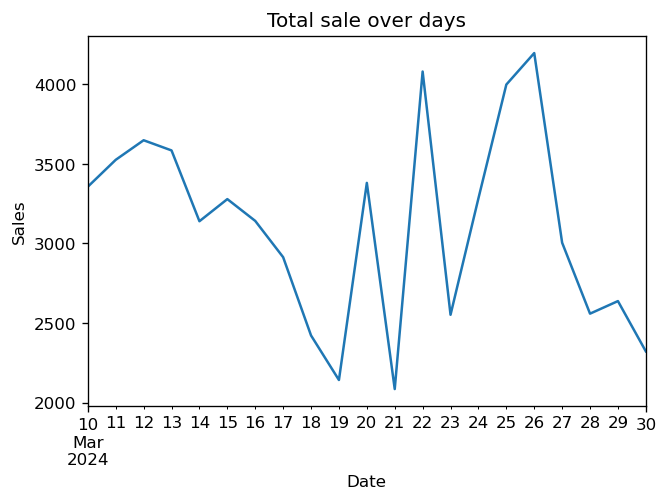

In [22]:
df_sales['Sales'].plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total sale over days')
plt.show()

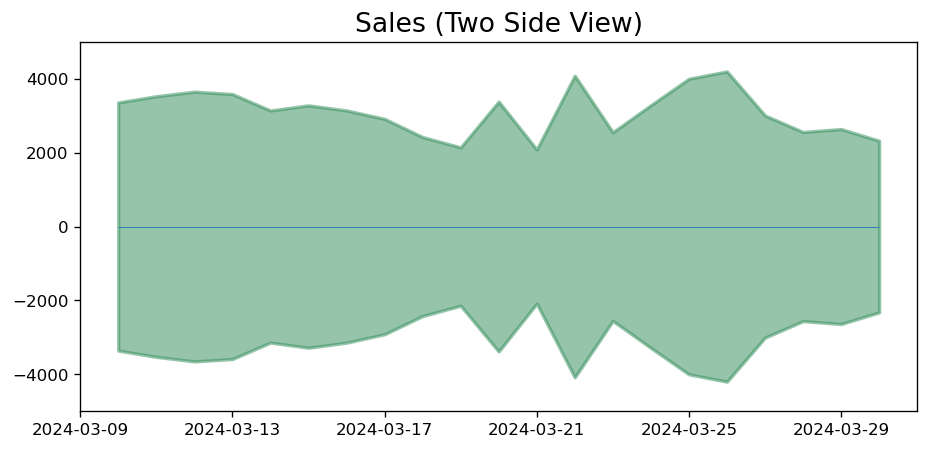

In [24]:
x= df_sales.index
y1= df_sales['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(9,4), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-5000, 5000)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_sales.index), xmax=np.max(df_sales.index), linewidth=.5)
plt.show()

/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/3328445030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['week'] = [d.week for d in df_sales.index]
/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/3328445030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.drop("week", axis=1, inplace=True)


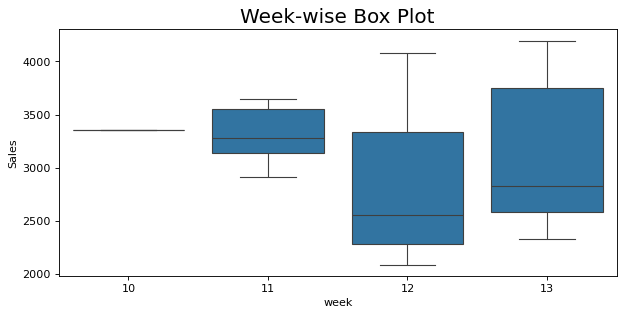

In [25]:
df_sales['week'] = [d.week for d in df_sales.index]
fig, axes = plt.subplots(1, 1, figsize=(9,4), dpi=80)
sns.boxplot(x='week', y='Sales', data=df_sales, ax=axes)
axes.set_title('Week-wise Box Plot', fontsize=18)
df_sales.drop("week", axis=1, inplace=True)
plt.show()

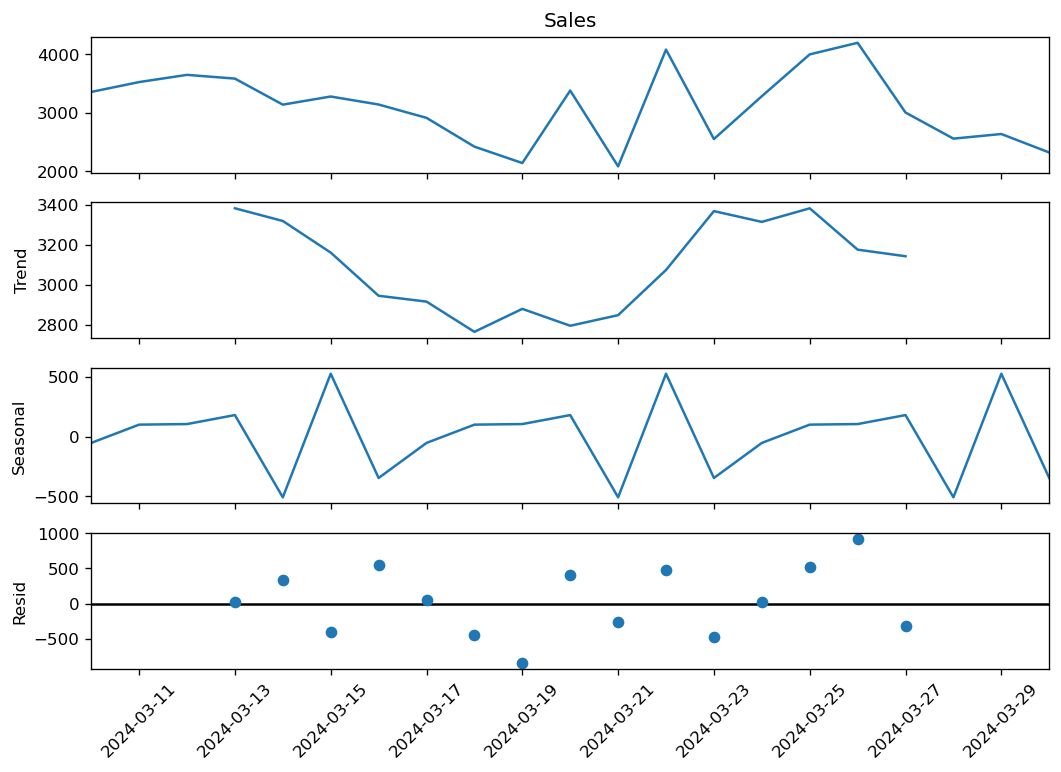

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

decomposition = sm.tsa.seasonal_decompose(df_sales['Sales'], model='additive')
fig = decomposition.plot()
plt.xticks(rotation=45)
plt.show()

# Check Stationarity

## Rolling mean and standard deviation

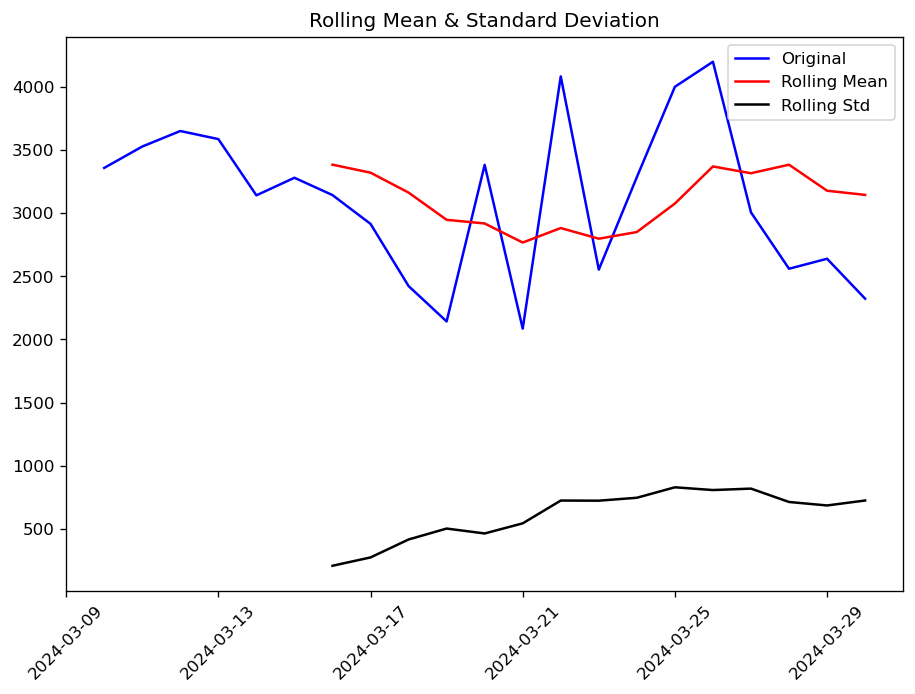

In [28]:
moving_avg = df_sales['Sales'].rolling(7).mean()
moving_std = df_sales['Sales'].rolling(7).std()

plt.plot(df_sales['Sales'], color='blue', label='Original')
plt.plot(moving_avg, color='red', label='Rolling Mean')
plt.plot(moving_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(rotation=45)
plt.show()

## Dickey-Fuller test

In [29]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_sales["Sales"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.237455
p-value                         0.192933
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


## Combined function

In [30]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_stationary(sales):
    moving_avg = sales.rolling(window=3).mean()
    moving_std = sales.rolling(window=3).std()

    plt.figure()
    plt.plot(sales, color='blue', label='Original')
    plt.plot(moving_avg, color='red', label='Rolling Mean')
    plt.plot(moving_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=45)
    plt.show()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(sales, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

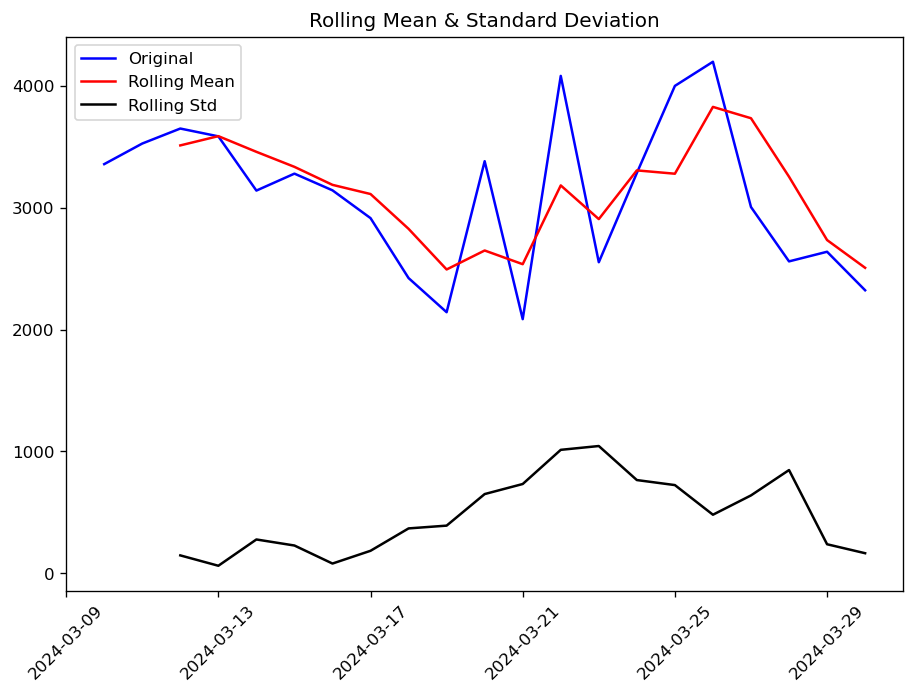

Results of Dickey-Fuller Test:
Test Statistic                 -2.237455
p-value                         0.192933
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64
The time series is non-stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [31]:
check_stationary(df_sales["Sales"])

# Make time series stationary
- Take a log transform
- Moving average
- Exponentially weighted moving average
- Difference
- Decomposition

## Log transform

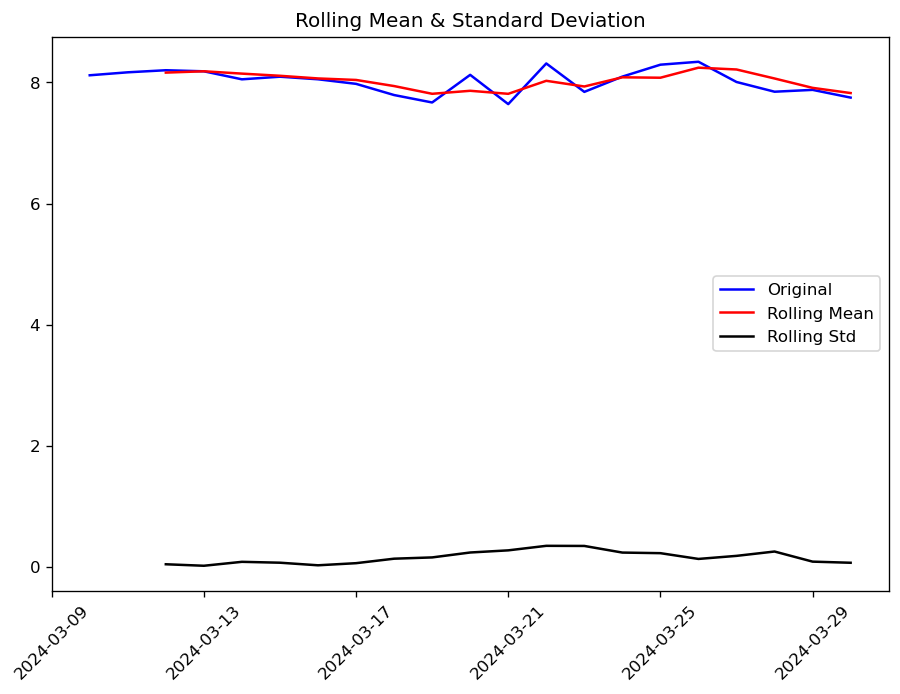

Results of Dickey-Fuller Test:
Test Statistic                 -4.083326
p-value                         0.001032
#Lags Used                      7.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [32]:
df_sales_log = np.log(df_sales)
check_stationary(df_sales_log["Sales"])

## Moving Average

(array([19791., 19795., 19799., 19803., 19807., 19811.]),
 [Text(19791.0, 0, '2024-03-09'),
  Text(19795.0, 0, '2024-03-13'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19811.0, 0, '2024-03-29')])

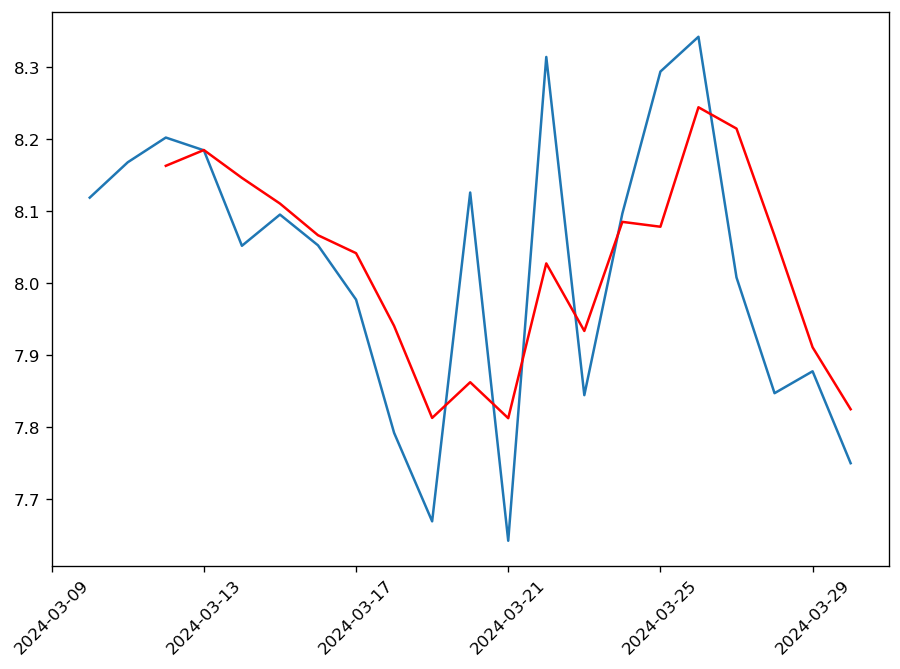

In [33]:
moving_avg = df_sales_log.rolling(3).mean()
plt.plot(df_sales_log)
plt.plot(moving_avg, color='red')
plt.xticks(rotation=45)

In [34]:
df_sales_rollmean = df_sales_log - moving_avg
df_sales_rollmean.head(7)

,Sales
Date,
2024-03-10,NaN
2024-03-11,NaN
2024-03-12,0.039232
2024-03-13,-0.000367
2024-03-14,-0.094255
2024-03-15,-0.015301
2024-03-16,-0.014014


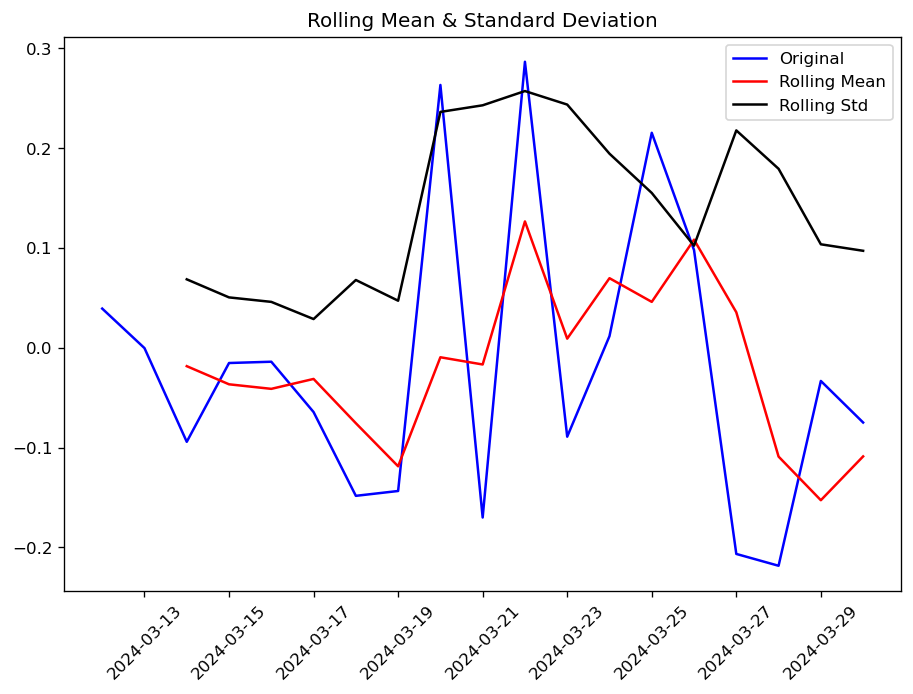

Results of Dickey-Fuller Test:
Test Statistic                 -3.139482
p-value                         0.023766
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [35]:
df_sales_rollmean.dropna(inplace=True)
check_stationary(df_sales_rollmean["Sales"])

(array([19791., 19795., 19799., 19803., 19807., 19811.]),
 [Text(19791.0, 0, '2024-03-09'),
  Text(19795.0, 0, '2024-03-13'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19811.0, 0, '2024-03-29')])

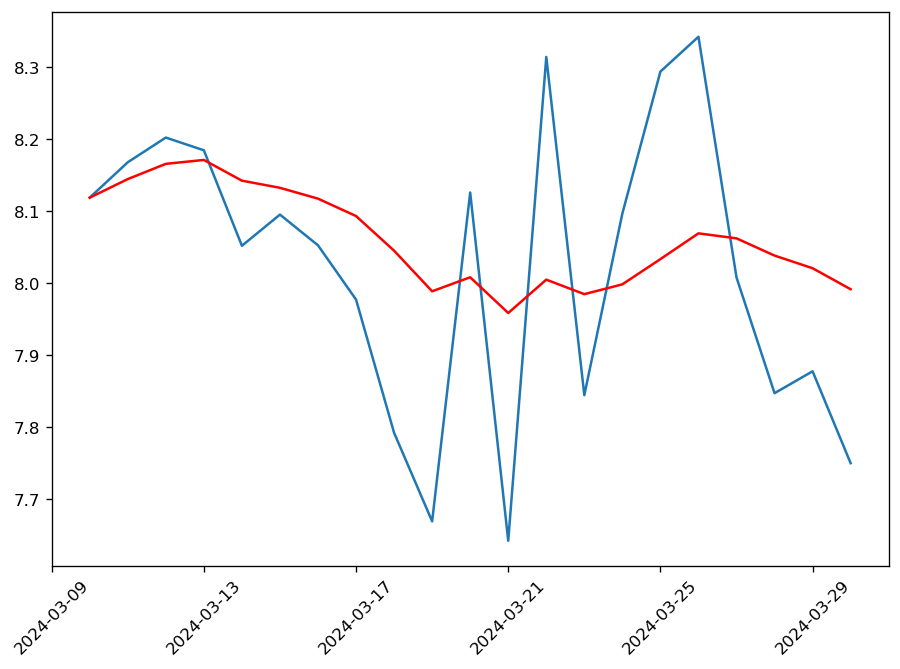

In [38]:
expwighted_avg = df_sales_log.ewm(halflife=7).mean()
plt.plot(df_sales_log)
plt.plot(expwighted_avg, color='red')
plt.xticks(rotation=45)

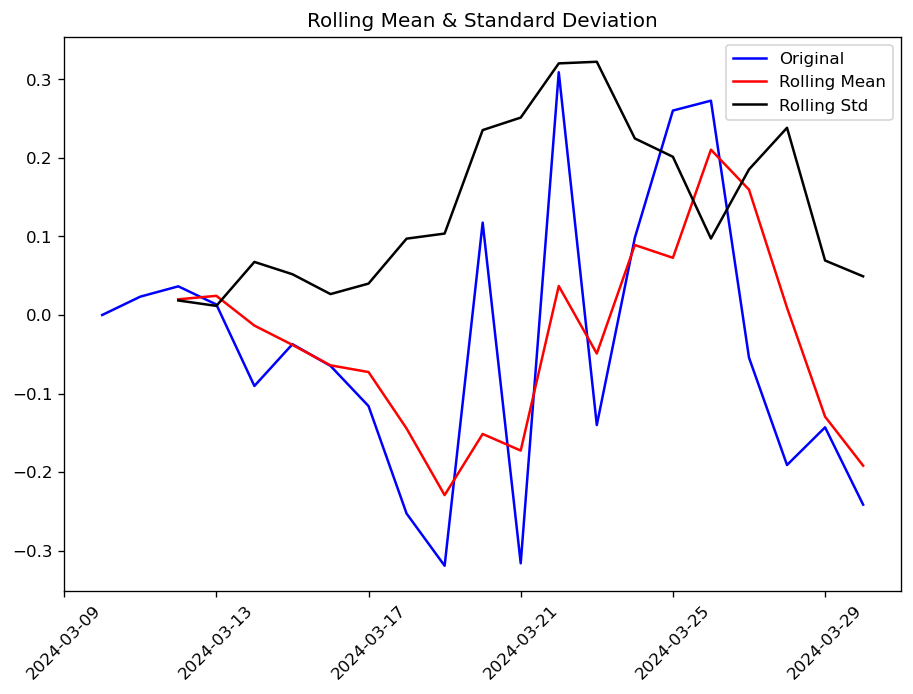

Results of Dickey-Fuller Test:
Test Statistic                 -3.371871
p-value                         0.011956
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [39]:
df_sales_ewm = df_sales_log - expwighted_avg
check_stationary(df_sales_ewm["Sales"])

# Differencing

(array([19793., 19795., 19797., 19799., 19801., 19803., 19805., 19807.,
        19809., 19811.]),
 [Text(19793.0, 0, '2024-03-11'),
  Text(19795.0, 0, '2024-03-13'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19801.0, 0, '2024-03-19'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19805.0, 0, '2024-03-23'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19809.0, 0, '2024-03-27'),
  Text(19811.0, 0, '2024-03-29')])

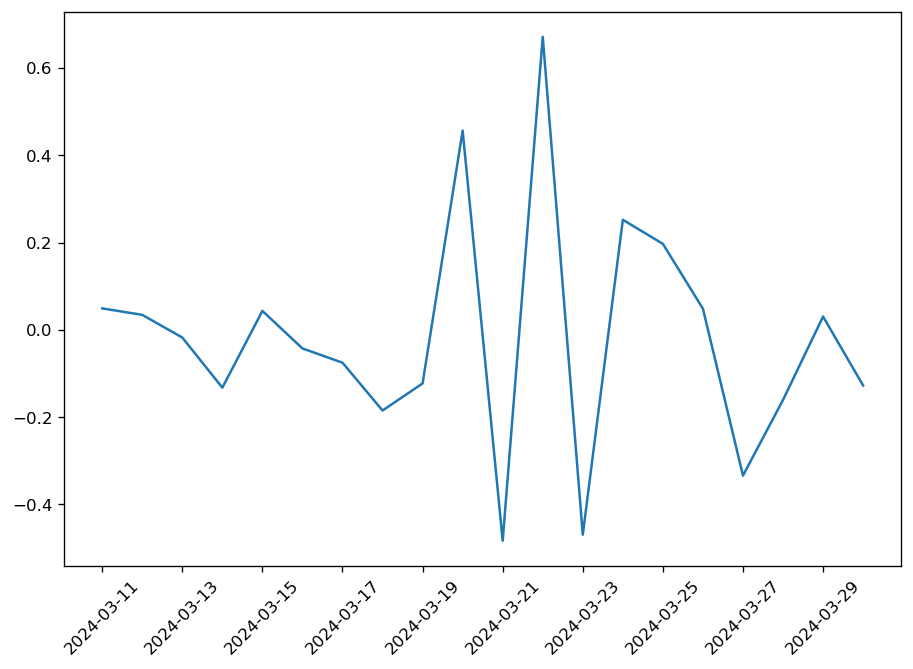

In [40]:
df_sales_diff = df_sales_log - df_sales_log.shift(1)
plt.plot(df_sales_diff)
plt.xticks(rotation=45)

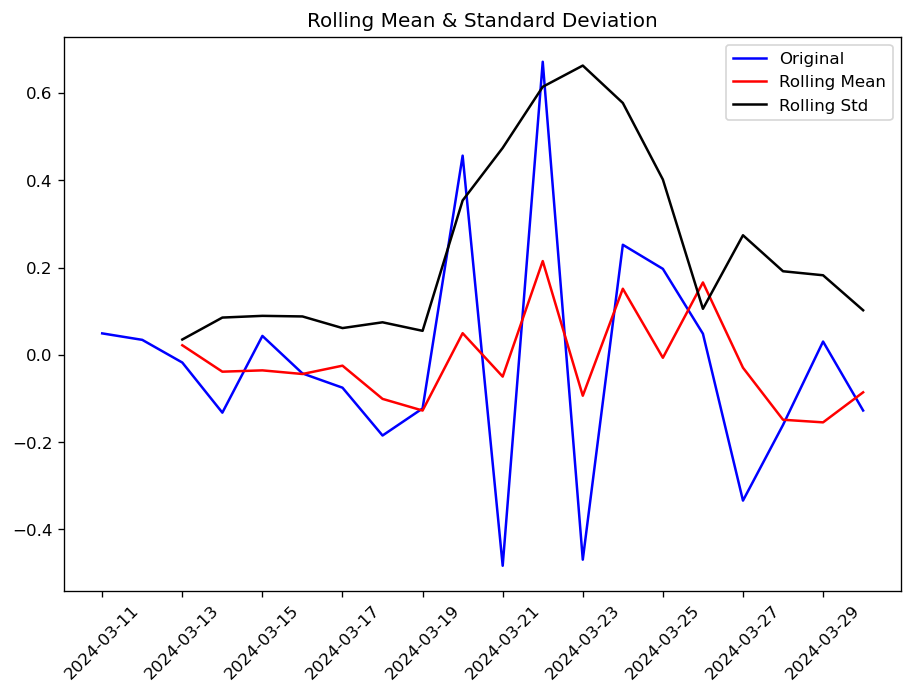

Results of Dickey-Fuller Test:
Test Statistic                 -5.554804
p-value                         0.000002
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [41]:
df_sales_diff.dropna(inplace=True)
check_stationary(df_sales_diff)

(array([19795., 19797., 19799., 19801., 19803., 19805., 19807., 19809.,
        19811.]),
 [Text(19795.0, 0, '2024-03-13'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19801.0, 0, '2024-03-19'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19805.0, 0, '2024-03-23'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19809.0, 0, '2024-03-27'),
  Text(19811.0, 0, '2024-03-29')])

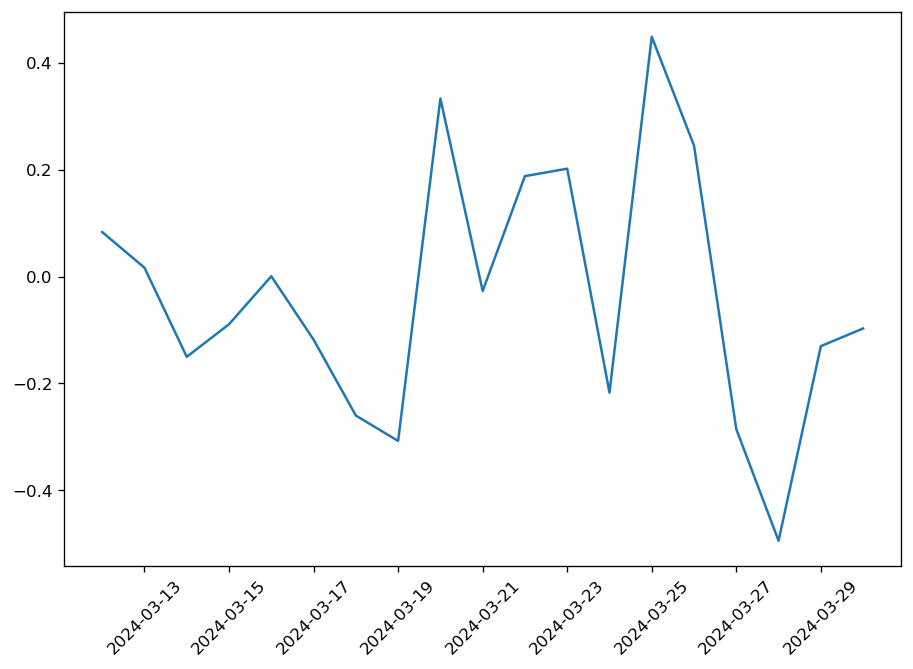

In [42]:
df_sales_diff_2 = df_sales_log - df_sales_log.shift(2)
plt.plot(df_sales_diff_2)
plt.xticks(rotation=45)

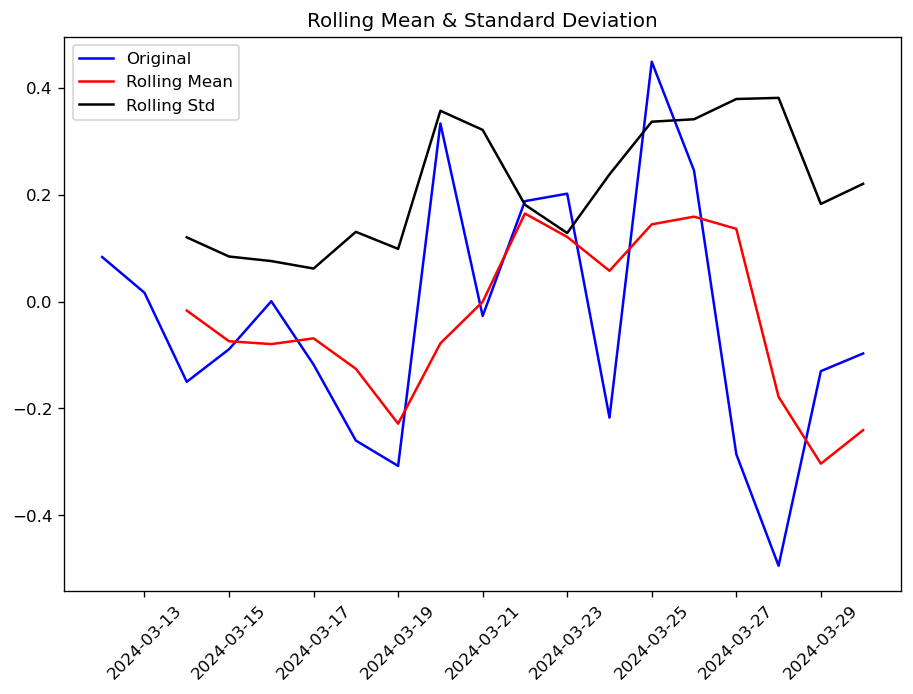

Results of Dickey-Fuller Test:
Test Statistic                -5.908953e+00
p-value                        2.666977e-07
#Lags Used                     7.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [43]:
df_sales_diff_2.dropna(inplace=True)
check_stationary(df_sales_diff_2)

## Decomposing

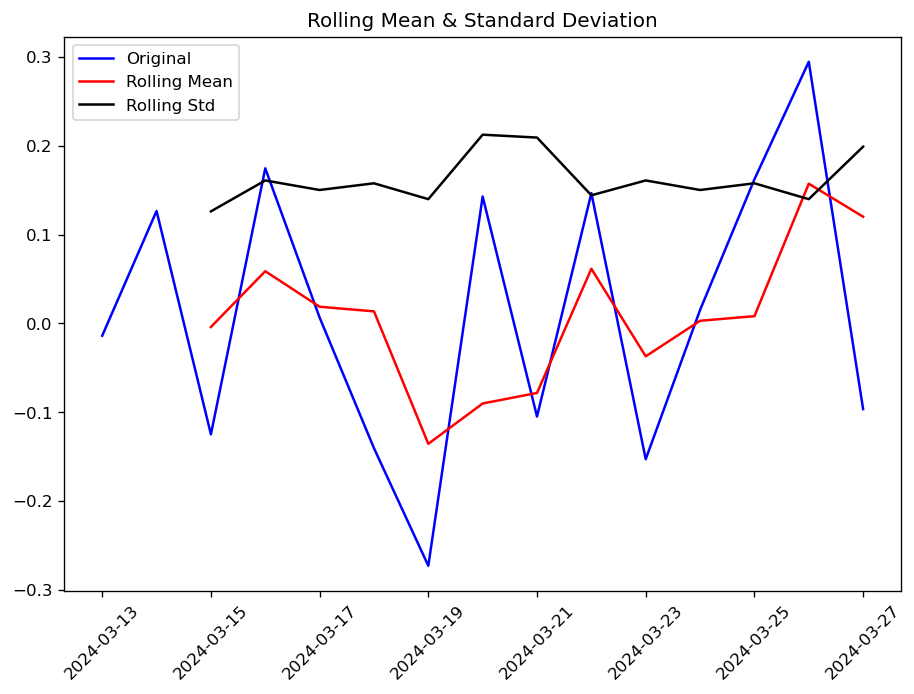

Results of Dickey-Fuller Test:
Test Statistic                 -4.272560
p-value                         0.000495
#Lags Used                      0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_sales_log)
residual = decomposition.resid

df_sales_decompose = residual
df_sales_decompose.dropna(inplace=True)
check_stationary(df_sales_decompose)

# Time Series Forecasting with ARIMA

In [45]:
train = df_sales[:-int(len(df_sales)*0.3)]
test = df_sales[-int(len(df_sales)*0.3):]

In [46]:
from pmdarima import auto_arima
auto_arima(train, test='adf', seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=232.383, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=217.107, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=215.932, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=217.831, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=219.754, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=217.521, Time=0.03 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.198 seconds


ARIMA(order=(2, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [47]:
auto_arima(df_sales, test='adf', seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=333.037, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=319.532, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=318.711, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=319.238, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=320.437, Time=0.02 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.222 seconds


ARIMA(order=(2, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [154]:
from statsmodels.tsa.arima.model import ARIMA

p = 2
d = 2
q = 0

train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)
model = ARIMA(train, order=(p,d,q)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   15
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -104.966
Date:                Tue, 23 Apr 2024   AIC                            215.932
Time:                        15:29:32   BIC                            217.627
Sample:                    03-10-2024   HQIC                           215.584
                         - 03-24-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2974      0.250     -5.180      0.000      -1.788      -0.807
ar.L2         -0.5434      0.310     -1.754      0.079      -1.151       0.064
sigma2      4.196e+05   1.44e+05      2.910      0.004    1.37e+05    7.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.89   Prob(JB):                         0.15
Heteroskedasticity (H):               0.68   Skew:                             1.23
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [155]:
pred = model.predict(start=len(train), end=(len(df_sales)-1),dynamic=True)
pred

2024-03-25    2998.036294
2024-03-26    2804.187004
2024-03-27    3043.958465
2024-03-28    2671.116835
2024-03-29    2857.439198
2024-03-30    2651.198399
Freq: D, Name: predicted_mean, dtype: float64

In [156]:
test

,Sales
Date,
2024-03-25,3999.0
2024-03-26,4197.0
2024-03-27,3005.0
2024-03-28,2559.0
2024-03-29,2638.0
2024-03-30,2322.0


In [157]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, pred)
print("Mean Absolute Error (MAE):", mae)

mape= mean_absolute_percentage_error(test, pred)
print('MAPE: %f' %mape)

Mean Absolute Error (MAE): 515.5815998973785
MAPE: 0.143983


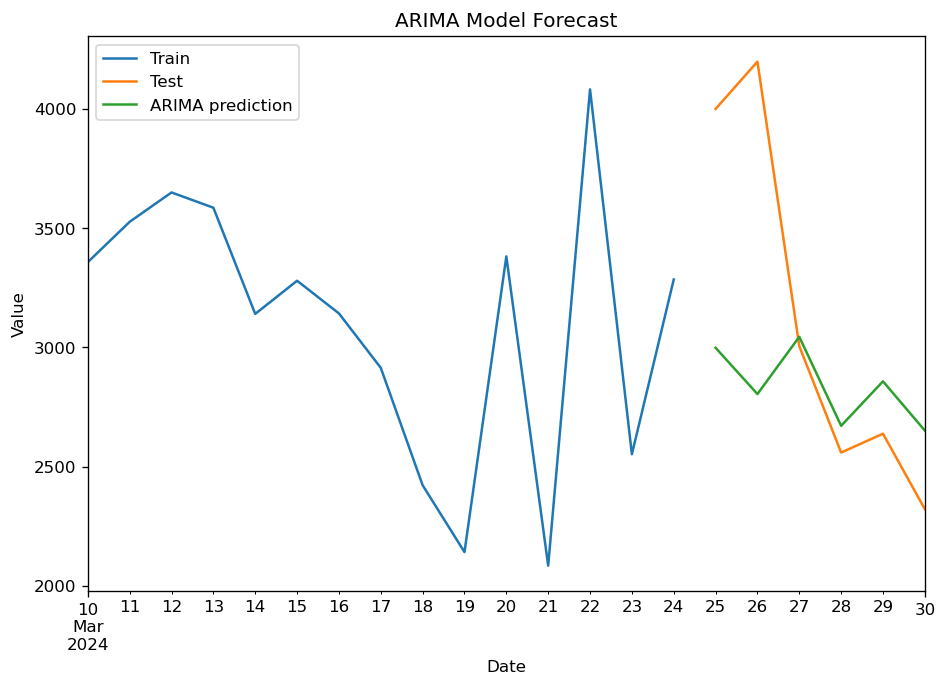

In [158]:
combined_data = pd.concat([train, test, pred], axis=1)
combined_data.columns = ['Train', 'Test', 'ARIMA prediction']

combined_data.plot(legend=True)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')

plt.show()

<Axes: >

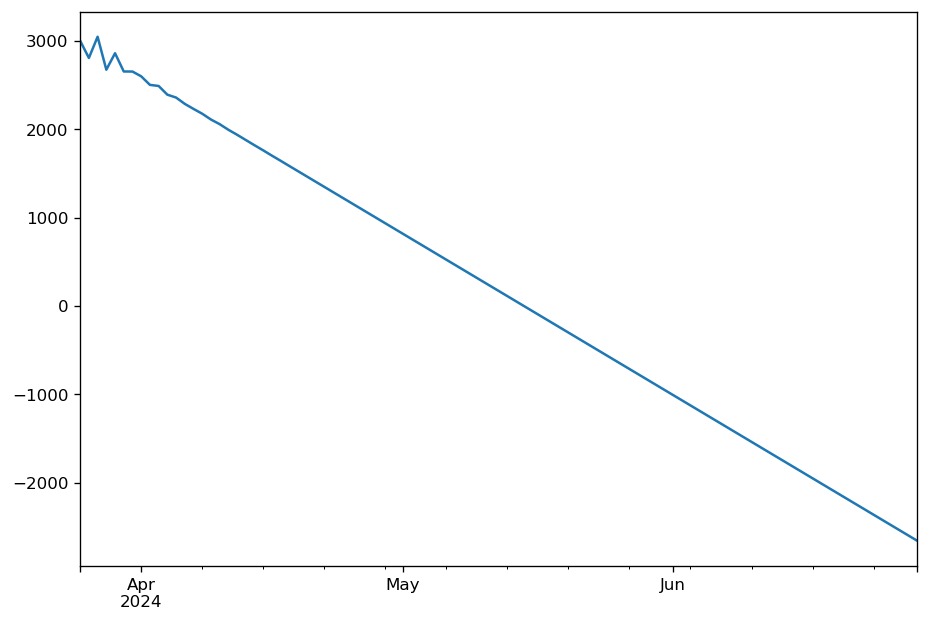

In [165]:
pred_future = model.predict(start=len(df_sales) - 6, end=len(df_sales)+90,dynamic=True)
pred_future.plot()

# Time Series Forecasting with SARIMAX

<Figure size 1680x720 with 0 Axes>

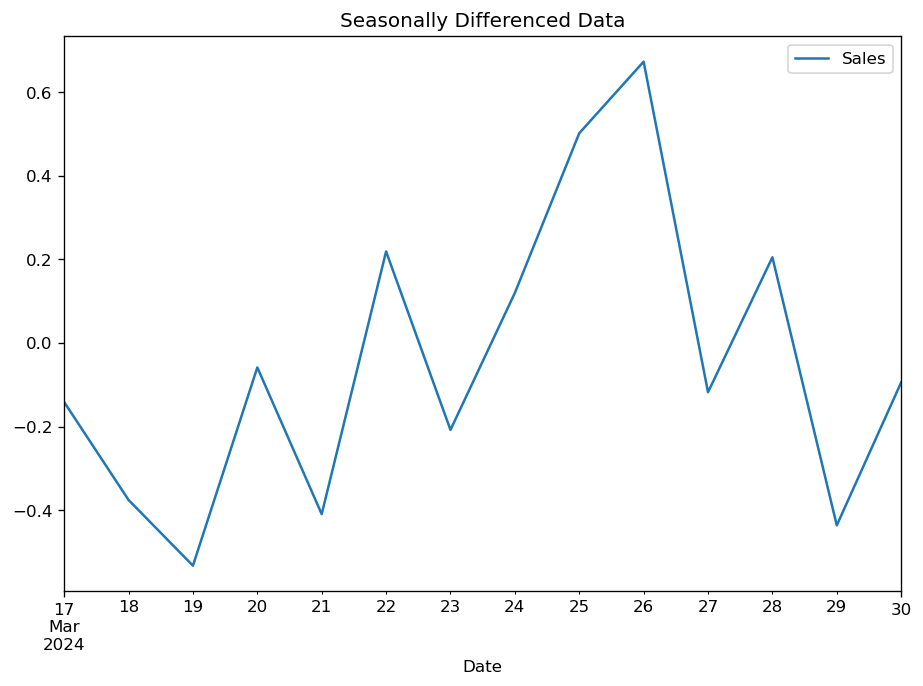

In [128]:
fig = plt.figure(figsize=(14,6))
seasonal_diff = df_sales_log.diff(7).dropna()
seasonal_diff.plot()
plt.title('Seasonally Differenced Data')
plt.show()

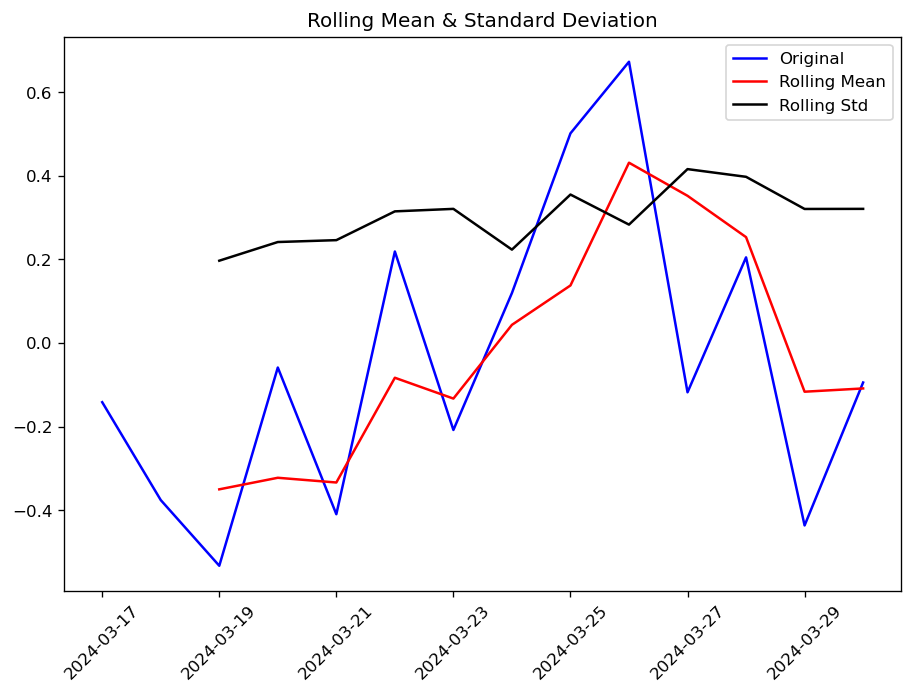

Results of Dickey-Fuller Test:
Test Statistic                 -2.642186
p-value                         0.084588
#Lags Used                      0.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64
The time series is non-stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_65248/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [129]:
check_stationary(seasonal_diff)

In [142]:
# from itertools import product
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# # Set parameter range
# p = range(0,3)
# q = range(0,3)
# d = range(0,2)
# s = [7]
# # Find all parameter combos
# pdq = list(product(p, d, q))
# seasonal_pdq = list(product(p, d, q, s))
# # Create SARIMA model for each order and seasonal order
# aics = []
# for order in pdq:
#     for seasonal_order in seasonal_pdq:
#         try:
#             model = SARIMAX(seasonal_diff, order=order, seasonal_order=seasonal_order)
#             results = model.fit()
#             aics.append((order, seasonal_order, results.aic))
#         except:
#             print('SARIMA{},{} - Skipped'.format(order, seasonal_order))
# # Check for smallest AIC
# aics.sort(key=lambda x: x[2])
# print(aics[0])

In [136]:
print(aics[0])

((1, 0, 0), (1, 0, 0, 7), 4.180552737875049)


In [178]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(train, order=(1,0,0), seasonal_order=(1,0,0,7))
results = model2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54929D+00    |proj g|=  2.15111D-01

At iterate    5    f=  8.26615D+00    |proj g|=  2.96322D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   2.710D-05   8.266D+00
  F =   8.2659615767460117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [179]:
pred2 = results.predict(start=len(train), end=(len(df_sales)-1),dynamic=True)
pred2

2024-03-25    3045.363609
2024-03-26    2855.701282
2024-03-27    2970.544517
2024-03-28    2595.711294
2024-03-29    2871.831439
2024-03-30    2463.739514
Freq: D, Name: predicted_mean, dtype: float64

In [180]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, pred2)
print("Mean Absolute Error (MAE):", mae)

mape= mean_absolute_percentage_error(test, pred2)
print('MAPE: %f' %mape)

Mean Absolute Error (MAE): 456.94547308526603
MAPE: 0.122258


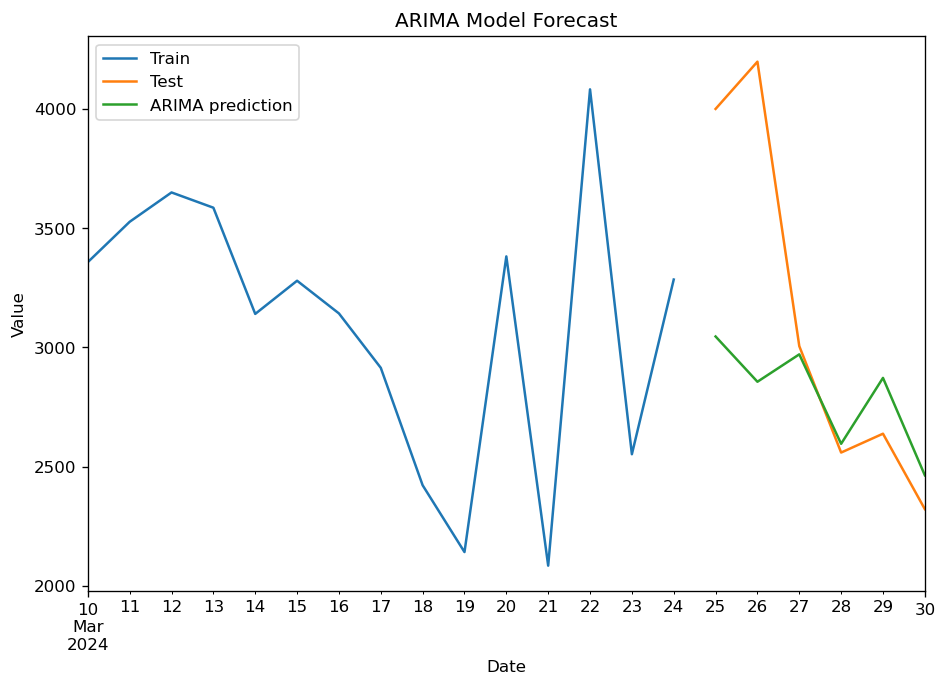

In [181]:
combined_data = pd.concat([train, test, pred2], axis=1)
combined_data.columns = ['Train', 'Test', 'ARIMA prediction']

combined_data.plot(legend=True)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')

plt.show()

<Axes: >

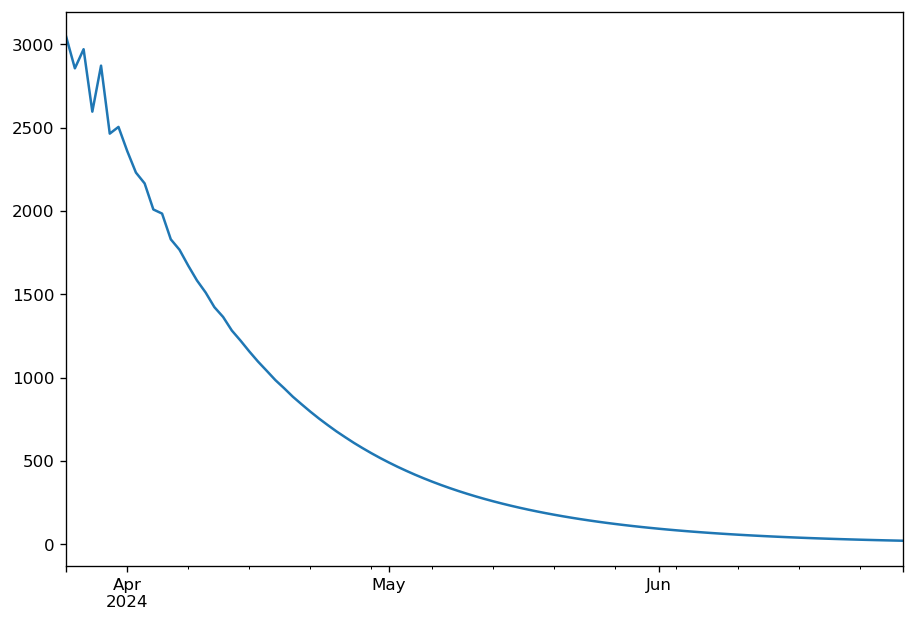

In [170]:
pred_future2 = results.predict(start=len(df_sales) - 6, end=len(df_sales)+90,dynamic=True)
pred_future2.plot()